In [1]:
!pip install scikit-learn
!pip install --upgrade threadpoolctl

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.drop(["CustomerID"], axis = 1, inplace=True)

In [5]:
df.isnull().sum()

Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
features = df[["Age", "Annual Income (k$)"]]
features

,Age,Annual Income (k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17
...,...,...
195,35,120
196,45,126
197,32,126
198,32,137


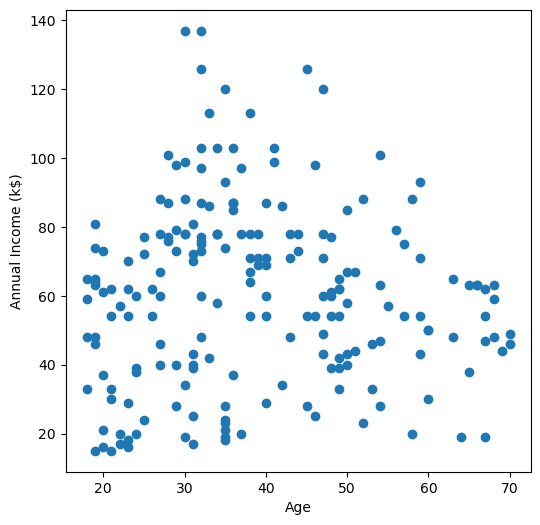

In [7]:
plt.figure(figsize=(6, 6))
plt.scatter(df['Age'], df['Annual Income (k$)'])
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

In [8]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)

In [9]:
kmeans.fit(features)

C:\Users\Target\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Target\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [10]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [11]:
kmeans.cluster_centers_

array([[28.36      , 31.44      ],
       [34.34782609, 82.82608696],
       [55.03448276, 50.34482759]])

Text(0, 0.5, 'Annual Income (k$)')

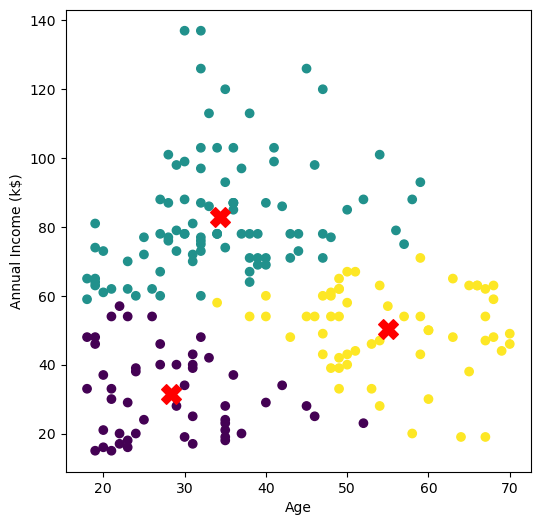

In [12]:
plt.figure(figsize=(6, 6))
plt.scatter(df['Age'], df['Annual Income (k$)'], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, color='red')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

In [15]:
df['Annual Income (k$)'] = scaler.fit_transform(df[['Annual Income (k$)']])

In [16]:
df['Age'] = scaler.fit_transform(df[['Age']])

In [17]:
features = df[["Age", "Annual Income (k$)"]]
features

,Age,Annual Income (k$)
0,0.019231,0.000000
1,0.057692,0.000000
2,0.038462,0.008197
3,0.096154,0.008197
4,0.250000,0.016393
...,...,...
195,0.326923,0.860656
196,0.519231,0.909836
197,0.269231,0.909836
198,0.269231,1.000000


In [18]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)

In [19]:
kmeans.fit(features)

C:\Users\Target\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Target\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

Text(0, 0.5, 'Annual Income (k$)')

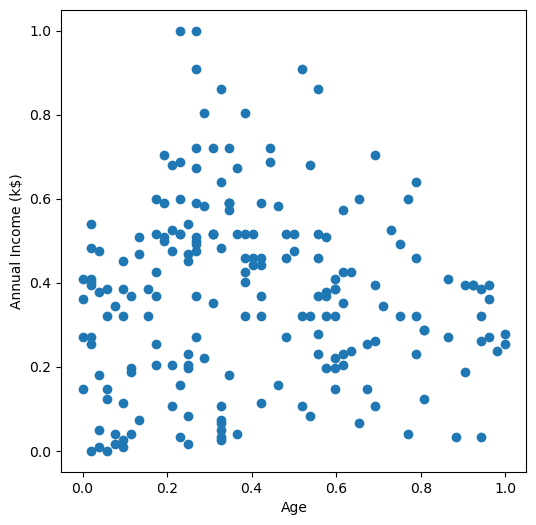

In [20]:
plt.figure(figsize=(6, 6))
plt.scatter(df['Age'], df['Annual Income (k$)'])
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')

In [21]:
print(kmeans.cluster_centers_)

[[0.15264423 0.21016906]
 [0.33653846 0.58435792]
 [0.72175481 0.29943648]]


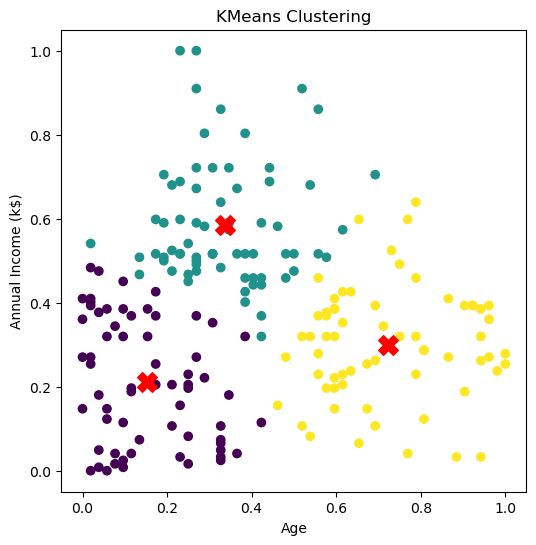

In [22]:
plt.figure(figsize=(6, 6))
plt.scatter(df['Age'], df['Annual Income (k$)'], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, color='red')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('KMeans Clustering')
plt.show()